<a href="https://colab.research.google.com/github/shivamsouravjha/Pose-estimators/blob/master/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import cv2
from keras.models import Model
from keras.callbacks import TensorBoard

from keras.models import load_model
import math
import numpy as np
import pathlib
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.python.framework import ops
from keras.models import Sequential # to create a cnn model
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,UpSampling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop,Adam,SGD,Adagrad,Adadelta,Adamax,Nadam
from keras.applications import xception

from tensorflow.keras.utils import plot_model
from IPython.display import Image

Using TensorFlow backend.


In [2]:
input_img = Input(shape=(64,64,1))
#encoding
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
m1 = MaxPooling2D((2, 2), padding='same')(x1)

 
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(m1)
m2 = MaxPooling2D((2, 2), padding='same')(x2)

x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(m2)
m3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(m3)
encoded = MaxPooling2D((2, 2), padding='same')(x4)

#decoding

y0 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
u0 = UpSampling2D((2, 2))(y0)

x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)

w  = Add()([u0,x4])

y1 = Conv2D(32, (3, 3), activation='relu', padding='same')(w)
u1 = UpSampling2D((2, 2))(y1)

x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)

w  = Add()([u1,x3])

y2 = Conv2D(32, (3, 3), activation='relu', padding='same')(w)
u2 = UpSampling2D((2, 2))(y2)

x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)

w  = Add()([u2,x2])


y3 = Conv2D(32, (3, 3), activation='relu', padding='same')(w)
u3 = UpSampling2D((2, 2))(y3)

x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)


w  = Add()([u3,x1])

decoded =Conv2D(1, (3, 3), activation='sigmoid',padding='same')(w)

autoencoder = Model(input_img, decoded)


In [3]:
autoencoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   9248        max_pooling2d_1[0][0]            
____________________________________________________________________________________________

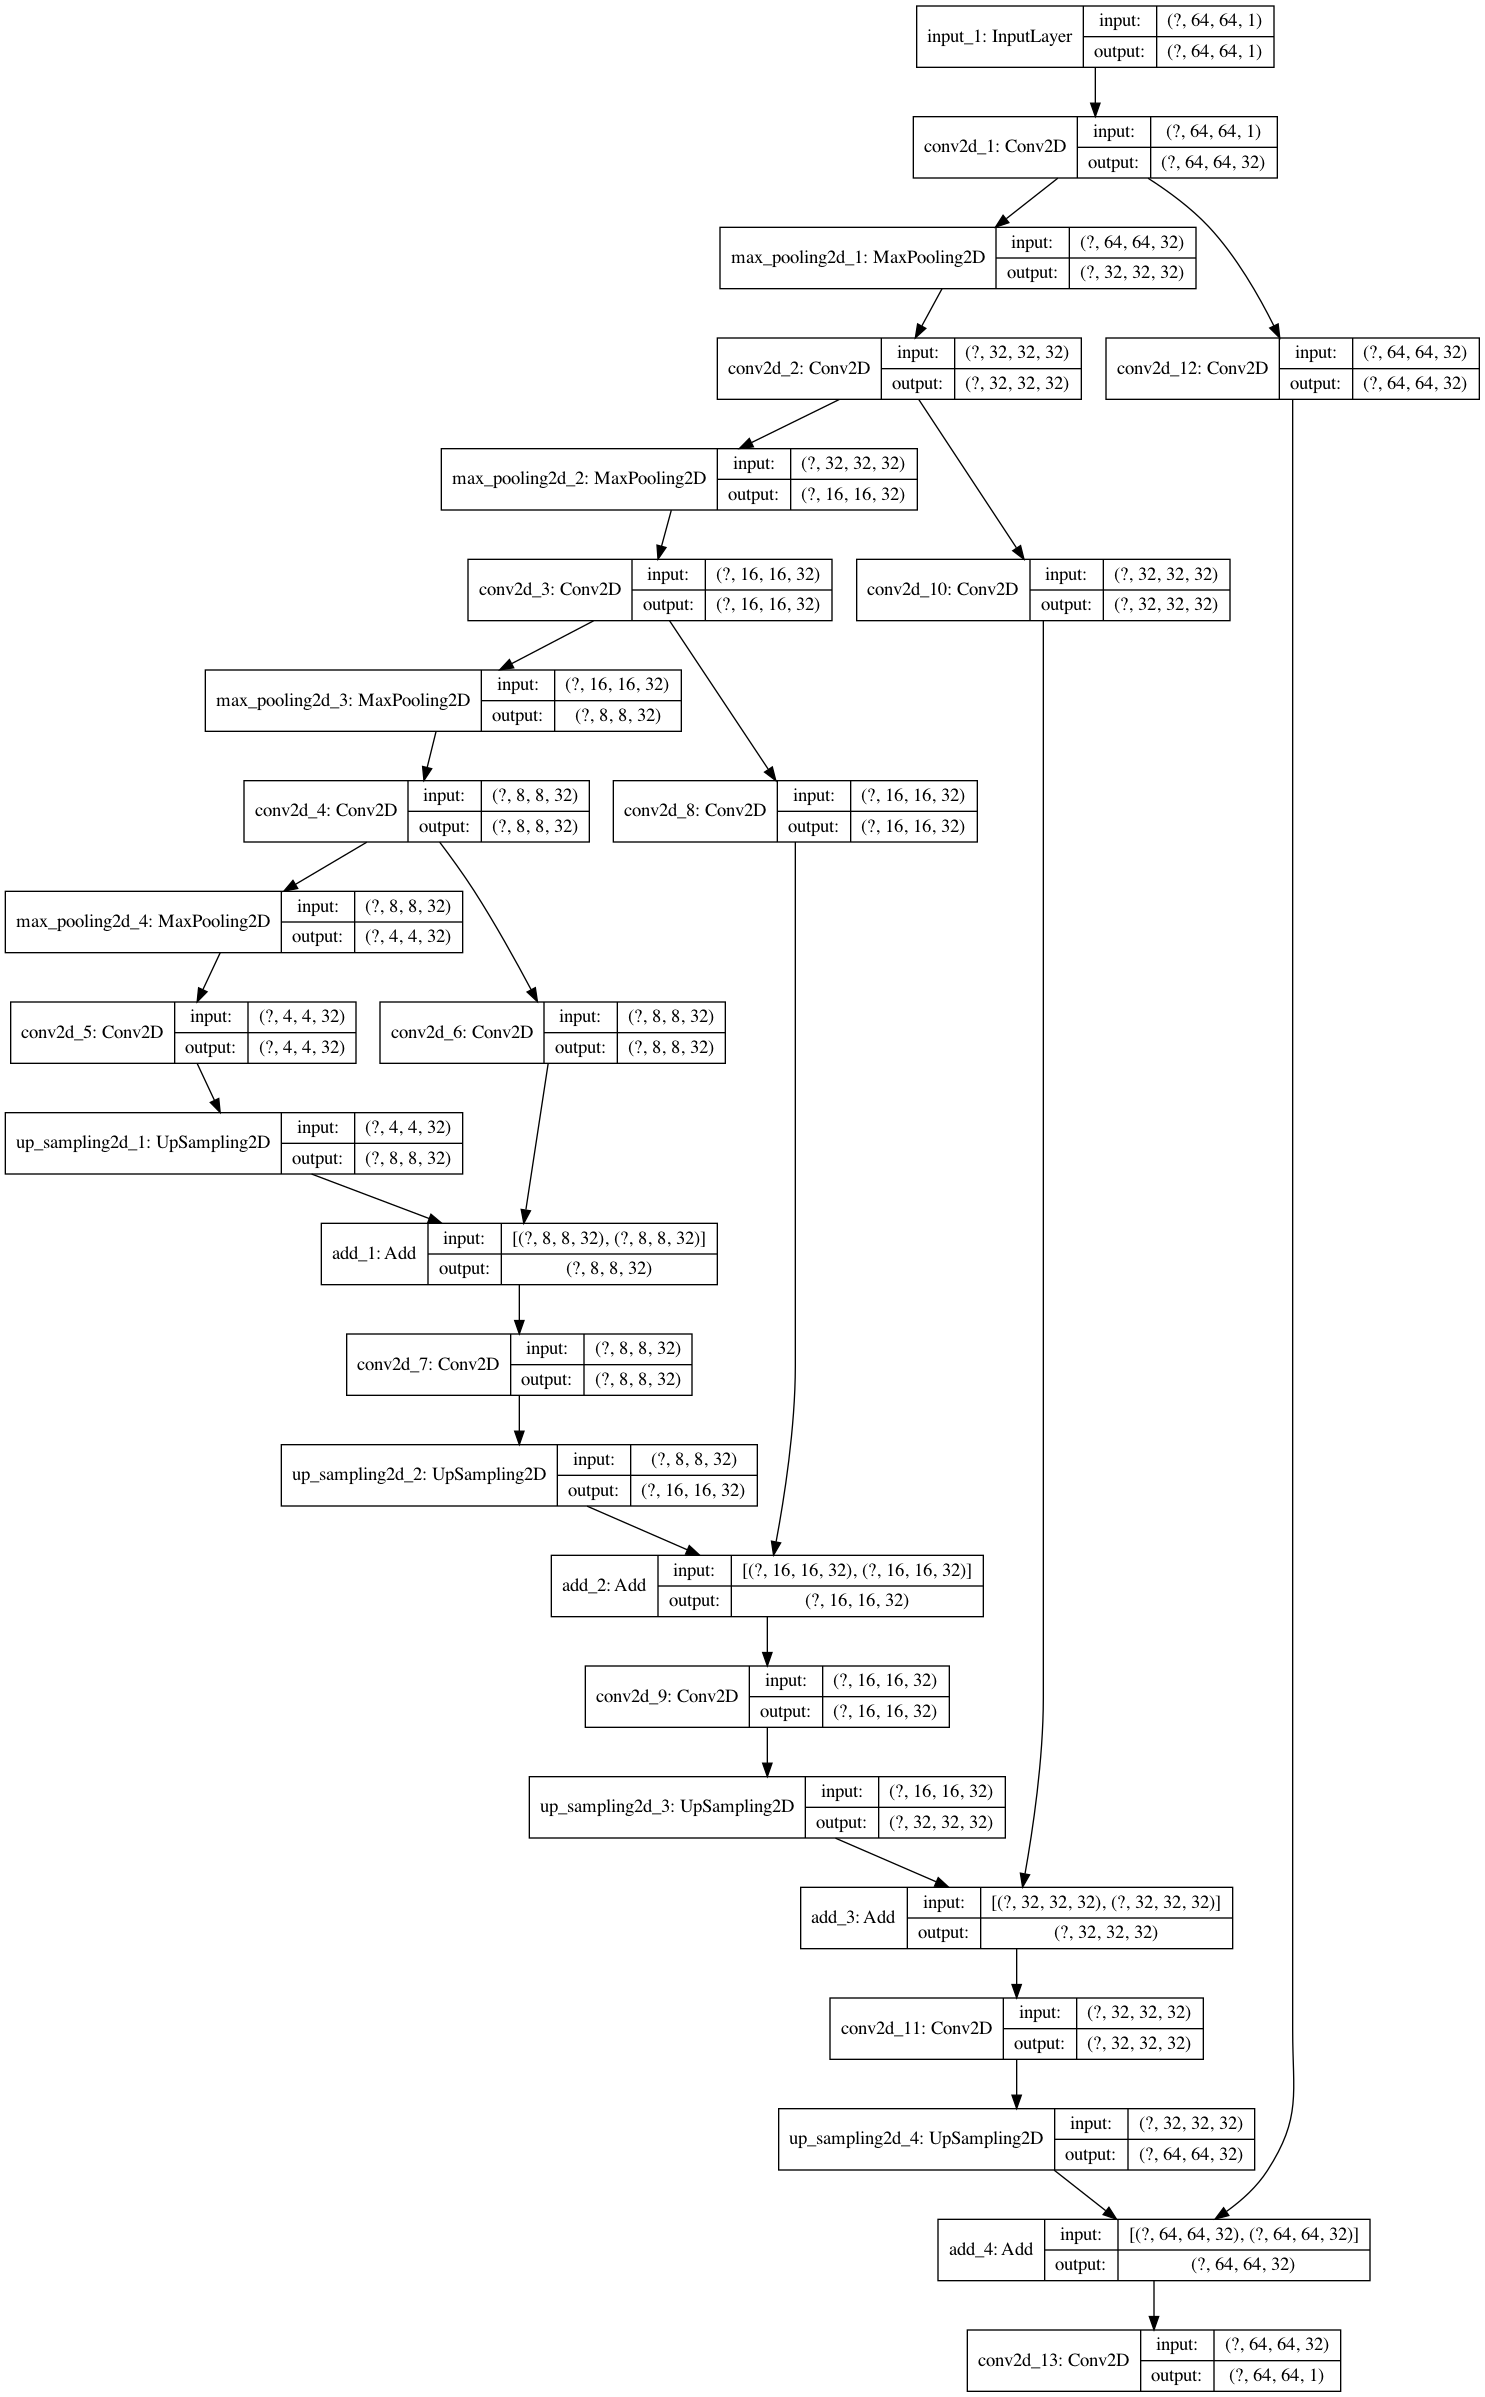

In [4]:
plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)
Image("model.png")

In [ ]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])